In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.393112617555374 159.06470110806117
30.871283172536323 -82.43583844914299
1.0075065879063487 -58.99846544558069
64.47732414954885 37.967916234302464
81.11653871404917 90.2301840992169
75.70959821188185 -75.0543829623701
7.489625870874974 -2.533000331776293
-65.06561628105366 -125.39949001843584
-82.80487698935343 103.66644073856634
-32.69335811991991 161.48626656495003
-4.479490222695446 -137.72546605655947
39.66997783824198 -12.616804066275193
-63.37823717911666 175.60034029502754
34.159173316290946 119.77911299335574
-76.73758162790628 136.25933777951798
-45.011665190959505 65.3200034949248
-13.197042075423752 -165.8948377563725
23.42713261035064 -153.23267401977714
56.10379735156934 -50.724238752192576
47.259310811239516 117.50953875085543
-41.329256244480646 62.47855096552715
-36.681341122308254 -41.96896001206309
-64.01208344428191 -130.11668933657552
26.89467759596039 21.322024370505773
67.31029779527498 -92.63107672995224
75.89835370559629 156.82892226629878
81.93276180951273 

85.4638478485081 78.23042603431509
-43.24723090712223 60.275886364991635
32.87012953446933 -54.637770607215785
9.293907031843247 -41.506096067724116
11.189816940109125 156.93081818229456
33.390925441918824 -12.381147203203568
54.359385976057126 24.085833746148836
-79.21171059651095 -107.45511197047169
-53.87897362456566 -132.40402453572568
14.147174133866258 98.96630815626366
-56.97140161048655 -60.47896772498643
55.91129167508507 -112.71995885632529
-55.611714071507954 31.95521637500954
-23.497678267597777 -141.34135327533403
-74.41796215345664 -163.08866889182087
42.236205931186305 112.56110145705111
-54.03174303586327 -79.8324108455302
-74.90877181600902 -161.03544977500337
-23.47214596719479 135.72204775818665
-35.556736197985316 -117.15785023728634
44.10259233052909 -163.7758051765489
33.07404845938136 130.99369569755078
-62.1005758276692 20.9003947758398
8.591327414753394 -67.03425417811557
51.83140180479501 -168.59471990432857
18.778275956866352 105.5391499177777
80.719644126802

57.052837016238556 169.57438395395485
42.4607668475503 10.117229667219561
86.78807554761661 -100.74495821311673
-13.797285522745113 16.11745216464618
-30.524333120703048 164.5190085514572
86.93202111334452 7.327689934035419
-7.83670010590788 -172.35622216481616
-61.966868381024184 -122.29494129962538
20.590085225520397 108.21217017371805
-47.953649044168515 -16.68181227389013
11.46082284808665 -14.217455988338656
87.39402951929986 -95.17212753707813
-70.99259277484374 -61.78898788195339
-78.42430283873631 88.53873746969941
0.942952310622772 -153.40790931992757
-53.19674044626148 -25.106507714717367
-24.64028862663838 86.53534437557425
9.473204849687917 -89.530914190622
14.207606973400843 103.21587589544356
-25.965220834680906 122.50864981899974
-89.87008060930604 127.91692890829279
81.74210066760045 67.37230807898624
-25.18201605098895 172.7810350190013
68.47506489952198 156.28890360991193
-78.98659309272028 -39.562323538827
-51.43255549569112 41.125937992893626
-51.476724917276904 122

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ca716ab48d8d7400907d4af31e1ab7b


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ca716ab48d8d7400907d4af31e1ab7b&q=Boston


In [10]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
city_weather.status_code

200

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


### convert URL to JSON, to parse

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 42.03,
  'feels_like': 42.03,
  'temp_min': 39.99,
  'temp_max': 44.01,
  'pressure': 1008,
  'humidity': 86},
 'visibility': 7057,
 'wind': {'speed': 1.99, 'deg': 150, 'gust': 8.99},
 'rain': {'1h': 4.1},
 'clouds': {'all': 100},
 'dt': 1618536858,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1618480961,
  'sunset': 1618529116},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### rename json variable to parse/ "get" keys and values

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data['sys']

{'type': 3,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1618480961,
 'sunset': 1618529116}

In [16]:
boston_data["sys"] ["country"]

'US'

In [17]:
boston_data["dt"]

1618536858

In [18]:
boston_data["coord"]["lat"]

42.3584

In [19]:
boston_data["main"]["temp_max"]

44.01

### retrieve data for lat, lang, max temp, humidity, clouds, and wind

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 44.01 86 100 1.99


### Datetime Module

In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

## Get the weather data for each city

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | waycross
Processing Record 3 of Set 1 | bonfim
Processing Record 4 of Set 1 | onega
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | berekum
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | peniche
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | dongkan
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | samusu
City not found. Skipping...
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | manzhouli
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | jalu
Processing Record 23 of Set

Processing Record 36 of Set 4 | porto novo
Processing Record 37 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 38 of Set 4 | patan
Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | santa lucia
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | tilichiki
Processing Record 46 of Set 4 | chigorodo
Processing Record 47 of Set 4 | misratah
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | aloleng
Processing Record 2 of Set 5 | samur
Processing Record 3 of Set 5 | bargal
City not found. Skipping...
Processing Record 4 of Set 5 | kaoma
Processing Record 5 of Set 5 | saint paul
Processing Record 6 of Set 5 | mandan
Processing Record 7 of Set 5 | fortuna
Processing Record 8 o

Processing Record 23 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 8 | rungata
City not found. Skipping...
Processing Record 25 of Set 8 | haines junction
Processing Record 26 of Set 8 | mantua
Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | kysyl-syr
Processing Record 29 of Set 8 | manta
Processing Record 30 of Set 8 | pimenta bueno
Processing Record 31 of Set 8 | jolalpan
Processing Record 32 of Set 8 | wanning
Processing Record 33 of Set 8 | san policarpo
Processing Record 34 of Set 8 | dingli
Processing Record 35 of Set 8 | sidvokodvo
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | vuktyl
Processing Record 42 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 43 of Se

Processing Record 12 of Set 12 | bani walid
Processing Record 13 of Set 12 | yangambi
Processing Record 14 of Set 12 | touba
Processing Record 15 of Set 12 | eyl
Processing Record 16 of Set 12 | riacho de santana
Processing Record 17 of Set 12 | yumen
Processing Record 18 of Set 12 | saint-doulchard
Processing Record 19 of Set 12 | margate
Processing Record 20 of Set 12 | kargasok
Processing Record 21 of Set 12 | santa maria
Processing Record 22 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 23 of Set 12 | caloto
Processing Record 24 of Set 12 | sug-aksy
City not found. Skipping...
Processing Record 25 of Set 12 | bokspits
City not found. Skipping...
Processing Record 26 of Set 12 | campbellton
Processing Record 27 of Set 12 | rabo de peixe
Processing Record 28 of Set 12 | tokur
Processing Record 29 of Set 12 | orillia
Processing Record 30 of Set 12 | sault sainte marie
Processing Record 31 of Set 12 | nicoya
Processing Record 32 of Set 12 | bouar
Processing Recor

In [23]:
len(city_data)

583

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.47,74,99,8.12,KI,2021-04-16 01:37:33
1,Waycross,31.2136,-82.3540,66.20,94,90,3.44,US,2021-04-16 01:37:33
2,Bonfim,3.0833,-59.9500,79.52,78,80,7.78,BR,2021-04-16 01:37:33
3,Onega,63.9061,38.1404,28.65,91,10,3.96,RU,2021-04-16 01:37:34
4,Talnakh,69.4865,88.3972,-15.54,95,90,17.13,RU,2021-04-16 01:37:34
5,Qaanaaq,77.4840,-69.3632,0.54,59,10,8.50,GL,2021-04-16 01:37:34
6,Berekum,7.4534,-2.5840,75.33,80,95,5.59,GH,2021-04-16 01:37:34
7,Rikitea,-23.1203,-134.9692,77.70,74,87,11.01,PF,2021-04-16 01:37:35
8,Albany,42.6001,-73.9662,39.99,78,100,2.59,US,2021-04-16 01:37:35
9,Port Macquarie,-31.4333,152.9167,75.00,38,44,4.00,AU,2021-04-16 01:35:24


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-04-16 01:37:33,3.0707,172.7902,82.47,74,99,8.12
1,Waycross,US,2021-04-16 01:37:33,31.2136,-82.3540,66.20,94,90,3.44
2,Bonfim,BR,2021-04-16 01:37:33,3.0833,-59.9500,79.52,78,80,7.78
3,Onega,RU,2021-04-16 01:37:34,63.9061,38.1404,28.65,91,10,3.96
4,Talnakh,RU,2021-04-16 01:37:34,69.4865,88.3972,-15.54,95,90,17.13
...,...,...,...,...,...,...,...,...,...
578,Corinto,GR,2021-04-16 01:40:16,37.9407,22.9573,50.00,64,55,1.88
579,Nang Rong,TH,2021-04-16 01:40:17,14.6377,102.7914,84.99,100,49,4.61
580,Jiquipilas,MX,2021-04-16 01:40:17,16.6667,-93.6500,91.40,35,40,9.22
581,Puerto Ayacucho,VE,2021-04-16 01:40:17,5.6639,-67.6236,76.69,82,13,4.43


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

### Scatter Plot Latitue vs. Max Temp

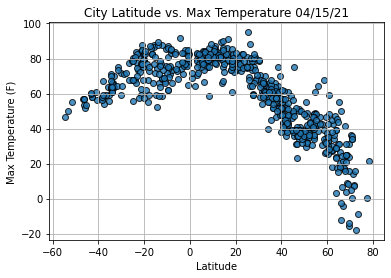

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Scatter Plot Lat vs. Humidity

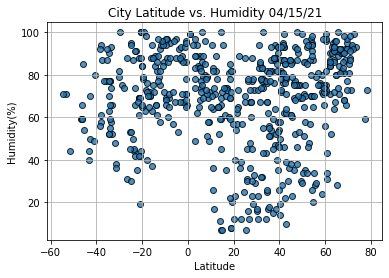

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

### Scatter plot Lat vs. Cloudiness

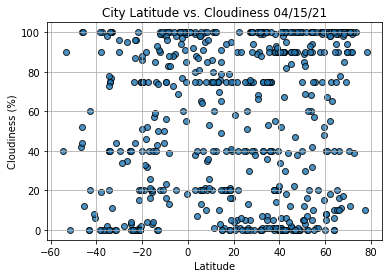

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

### Scatter Plot Lat vs. Wind Speed

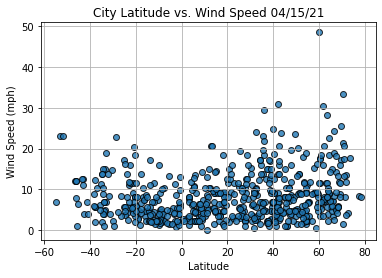

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

### Correlation & Line Regression Charts

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Regression Lat vs. Max Temp

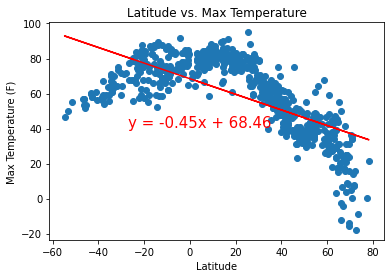

In [62]:
plot_linear_regression(lats, max_temps, "Latitude vs. Max Temperature", "Max Temperature (F)", coordinate)

### Regression Lat vs. Humidity

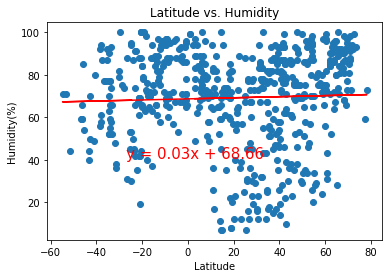

In [63]:
plot_linear_regression(lats, humidity, "Latitude vs. Humidity", "Humidity(%)", coordinate)

### Regression Lat vs. Cloudiness

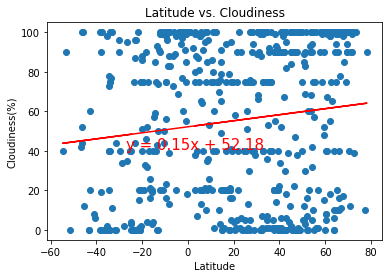

In [64]:
plot_linear_regression(lats, cloudiness, "Latitude vs. Cloudiness", "Cloudiness(%)", coordinate)

### Regression Lat vs Wind Speed

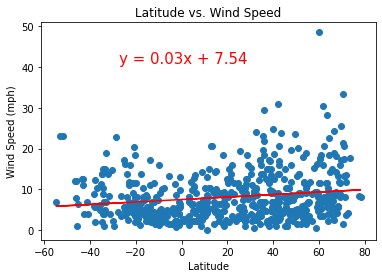

In [65]:
plot_linear_regression(lats, wind_speed, "Latitude vs. Wind Speed", "Wind Speed (mph)", coordinate)

## Create the Hemisphere DataFrames for Regression (max temps) 

### Northern Hemisphere DataFrame

In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-04-16 01:37:33,3.0707,172.7902,82.47,74,99,8.12
1,Waycross,US,2021-04-16 01:37:33,31.2136,-82.3540,66.20,94,90,3.44
2,Bonfim,BR,2021-04-16 01:37:33,3.0833,-59.9500,79.52,78,80,7.78
3,Onega,RU,2021-04-16 01:37:34,63.9061,38.1404,28.65,91,10,3.96
4,Talnakh,RU,2021-04-16 01:37:34,69.4865,88.3972,-15.54,95,90,17.13


### Southern Hemisphere DataFrame

In [67]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Rikitea,PF,2021-04-16 01:37:35,-23.1203,-134.9692,77.70,74,87,11.01
9,Port Macquarie,AU,2021-04-16 01:35:24,-31.4333,152.9167,75.00,38,44,4.00
10,Atuona,PF,2021-04-16 01:37:35,-9.8000,-139.0333,80.91,69,56,15.95
12,Kaitangata,NZ,2021-04-16 01:37:36,-46.2817,169.8464,53.17,66,100,7.96
14,Hobart,AU,2021-04-16 01:37:36,-42.8794,147.3294,57.99,50,20,12.66


### Regression on Northern Hemisphere and Max Temp

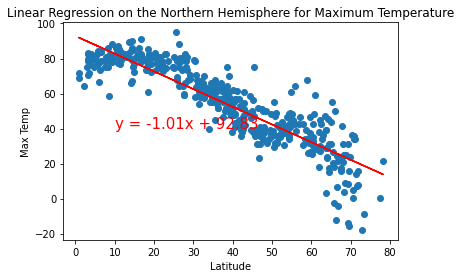

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))


### Regression on Southern Hemisphere and Max Temp

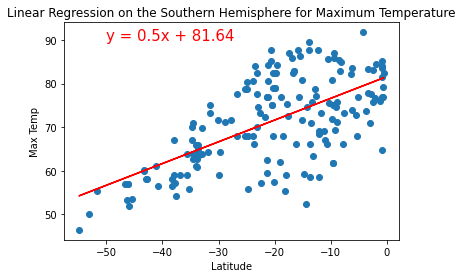

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,90))


## Correlation Between Latitude and Percent Humidity

### Regression on Northern Hemisphere Lat vs % Humidity

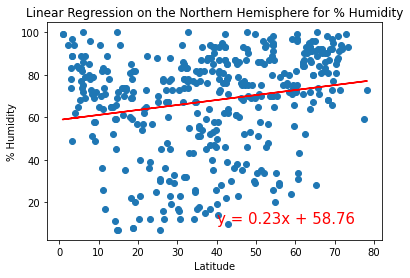

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

### Regression on Southern Hemisphere Lat vs % Humidity

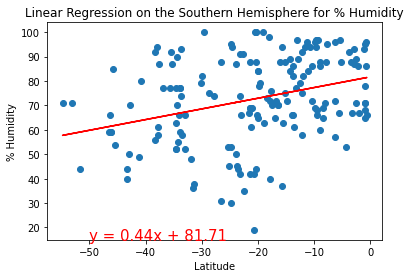

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

## Correlation Between Latitude and Percent Cloudiness

### Regression on Northern Hemisphere Lat vs. Cloudiness (%)

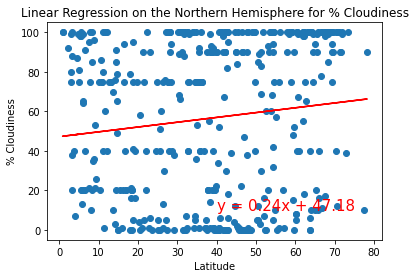

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

### Regression on Southern Hemisphere Lat vs. Cloudiness (%)

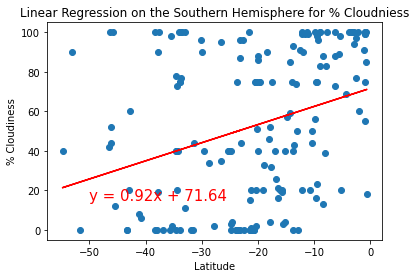

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudniess', '% Cloudiness',(-50,15))

## Correlation Between Latitude and Wind Speed

###  Regression on  Northern Hemisphere Lat vs Wind Speed 

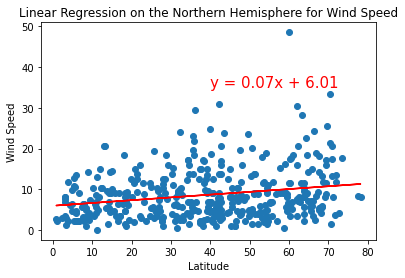

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

###  Regression on  Southern Hemisphere Lat vs Wind Speed 

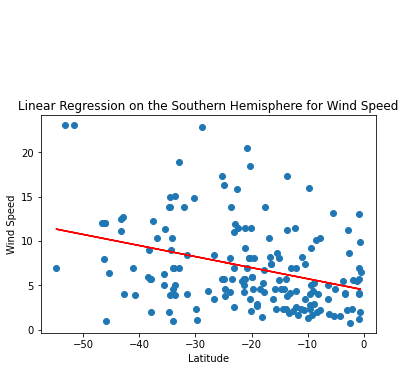

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))